In [44]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ambient2/ambient-weather-20210619-20220331.csv


In [45]:
import datetime as datetime
import seaborn as sns

In [46]:
pd.set_option('max_columns', 100)
pd.set_option('max_rows', 100)

In [47]:
df = pd.read_csv('../input/ambient2/ambient-weather-20210619-20220331.csv')

In [48]:
df.columns

Index(['Simple Date', 'Outdoor Temperature', 'Feels Like', 'Dew Point',
       'Wind Speed', 'Wind Gust', 'Max Daily Gust', 'Wind Direction',
       'Hourly Rain', 'Event Rain', 'Daily Rain', 'Weekly Rain',
       'Monthly Rain', 'Yearly Rain', 'Outdoor Humidity',
       'Ultra-Violet Radiation Index', 'Solar Radiation',
       'Learning Lab Temperature', 'Learning Lab Humidity',
       'Avg Wind Direction', 'Avg Wind Speed', 'Learning Lab Feels Like',
       'Learning Lab Dew Point'],
      dtype='object')

In [49]:
df.set_index('Simple Date')

,Outdoor Temperature,Feels Like,Dew Point,Wind Speed,Wind Gust,Max Daily Gust,Wind Direction,Hourly Rain,Event Rain,Daily Rain,Weekly Rain,Monthly Rain,Yearly Rain,Outdoor Humidity,Ultra-Violet Radiation Index,Solar Radiation,Learning Lab Temperature,Learning Lab Humidity,Avg Wind Direction,Avg Wind Speed,Learning Lab Feels Like,Learning Lab Dew Point
Simple Date,,,,,,,,,,,,,,,,,,,,,,
2022-03-31 23:55:00,39.2,37.3,36.5,3.1,5.8,20.6,256.0,0.0,0.0,0.0,0.0,2.68,43.53,90.0,0.0,0.0,41.2,96.0,259.0,3.8,41.2,40.1
2022-03-31 23:50:00,39.2,39.2,36.5,2.5,4.5,20.6,256.0,0.0,0.0,0.0,0.0,2.68,43.53,90.0,0.0,0.0,41.2,96.0,261.0,4.0,41.2,40.1
2022-03-31 23:45:00,39.4,36.2,36.7,4.5,5.8,20.6,266.0,0.0,0.0,0.0,0.0,2.68,43.53,90.0,0.0,0.0,41.4,96.0,250.0,4.5,41.4,40.3
2022-03-31 23:40:00,39.6,36.6,36.9,4.3,4.5,20.6,254.0,0.0,0.0,0.0,0.0,2.68,43.53,90.0,0.0,0.0,41.4,96.0,256.0,3.8,41.4,40.3
2022-03-31 23:35:00,39.6,39.6,36.9,2.9,5.8,20.6,243.0,0.0,0.0,0.0,0.0,2.68,43.53,90.0,0.0,0.0,41.5,96.0,258.0,3.8,41.5,40.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-19 10:25:00,71.6,72.2,64.7,0.0,0.0,5.8,24.0,0.0,0.0,0.0,0.0,0.00,0.00,79.0,0.0,83.2,74.3,73.0,24.0,0.0,74.9,65.1
2021-06-19 10:20:00,71.4,72.0,64.5,0.0,0.0,5.8,23.0,0.0,0.0,0.0,0.0,0.00,0.00,79.0,0.0,94.9,74.3,74.0,23.0,0.0,74.9,65.5
2021-06-19 10:15:00,71.4,72.0,64.9,0.9,1.1,5.8,23.0,0.0,0.0,0.0,0.0,0.00,0.00,80.0,0.0,97.5,74.3,73.0,23.0,0.0,74.9,65.1


In [50]:
df_ll_high = df.loc[df['Learning Lab Temperature'] > 82]
df_ll_low = df.loc[df['Learning Lab Temperature'] < 45]

In [51]:
df_ll_high['Learning Lab Temperature']

356      89.4
357      88.7
358      85.3
359      84.4
360      85.1
         ... 
41005    84.0
41006    84.7
41007    84.4
41008    83.5
41009    83.3
Name: Learning Lab Temperature, Length: 8609, dtype: float64

In [52]:
df_ll_high["Learning Lab Temperature"].mean()

91.07794168892974

In [53]:
df_ll_low["Learning Lab Temperature"].mean()

34.8172986791649

35.3

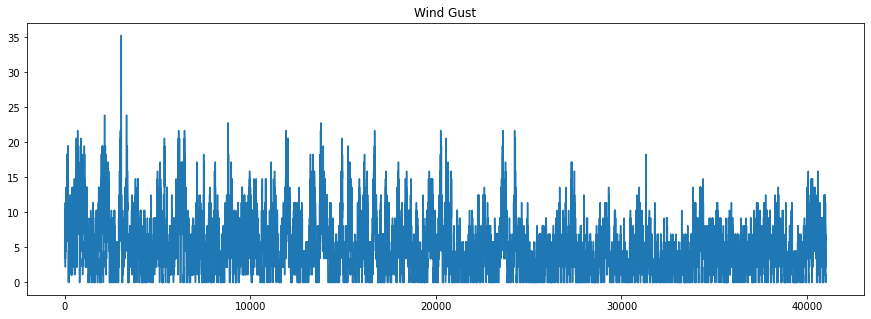

In [54]:
df['Wind Gust'].plot(figsize=(15, 5), title='Wind Gust')
df['Wind Gust'].max()

<AxesSubplot:xlabel='Outdoor Temperature', ylabel='Learning Lab Temperature'>

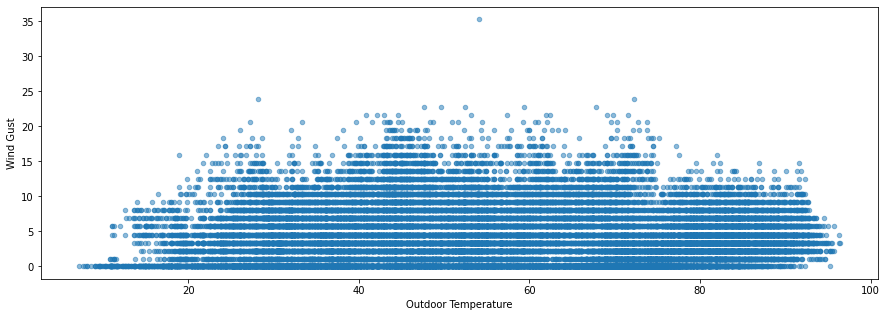

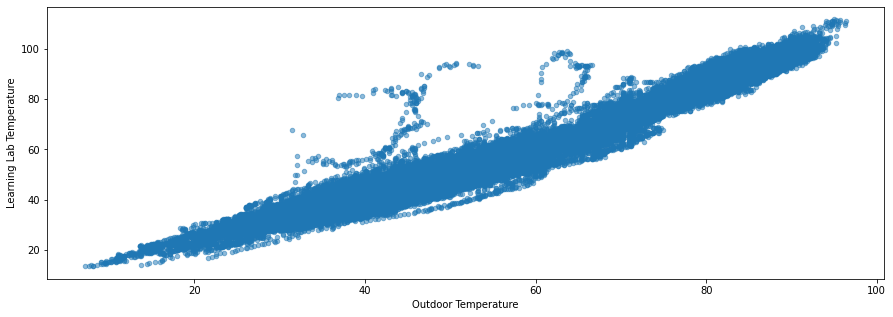

In [55]:
df.plot.scatter(x='Outdoor Temperature', y='Wind Gust',alpha=0.5, figsize=(15, 5))
df.plot.scatter(x='Outdoor Temperature', y='Learning Lab Temperature',alpha=0.5, figsize=(15, 5))

In [56]:
df['Outdoor Temperature'] = df['Outdoor Temperature'].astype('float32')
df['Learning Lab Temperature'] = df['Learning Lab Temperature'].astype('float32')
df['Wind Gust'] = df['Wind Gust'].astype('float32')
df['Daily Rain'] = df['Daily Rain'].astype('float32')
df['Solar Radiation'] = df['Solar Radiation'].astype('float32')

In [57]:
df_small = df[['Simple Date','Outdoor Temperature', 'Learning Lab Temperature', 'Wind Gust', 'Event Rain','Solar Radiation']].copy()
df_small = df_small.rename(columns={'Simple Date':'Date','Outdoor Temperature':'Outdoor_Temp', 'Learning Lab Temperature':'Learning_Lab_Temp', 'Wind Gust': 'Wind_Gust', 'Event Rain':'Event_Rain','Solar Radiation':'Solar_Radiation'})


In [58]:
df_small

,Date,Outdoor_Temp,Learning_Lab_Temp,Wind_Gust,Event_Rain,Solar_Radiation
0,2022-03-31 23:55:00,39.200001,41.200001,5.8,0.0,0.000000
1,2022-03-31 23:50:00,39.200001,41.200001,4.5,0.0,0.000000
2,2022-03-31 23:45:00,39.400002,41.400002,5.8,0.0,0.000000
3,2022-03-31 23:40:00,39.599998,41.400002,4.5,0.0,0.000000
4,2022-03-31 23:35:00,39.599998,41.500000,5.8,0.0,0.000000
...,...,...,...,...,...,...
41021,2021-06-19 10:25:00,71.599998,74.300003,0.0,0.0,83.199997
41022,2021-06-19 10:20:00,71.400002,74.300003,0.0,0.0,94.900002
41023,2021-06-19 10:15:00,71.400002,74.300003,1.1,0.0,97.500000
41024,2021-06-19 10:10:00,71.400002,74.300003,2.2,0.0,88.500000


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

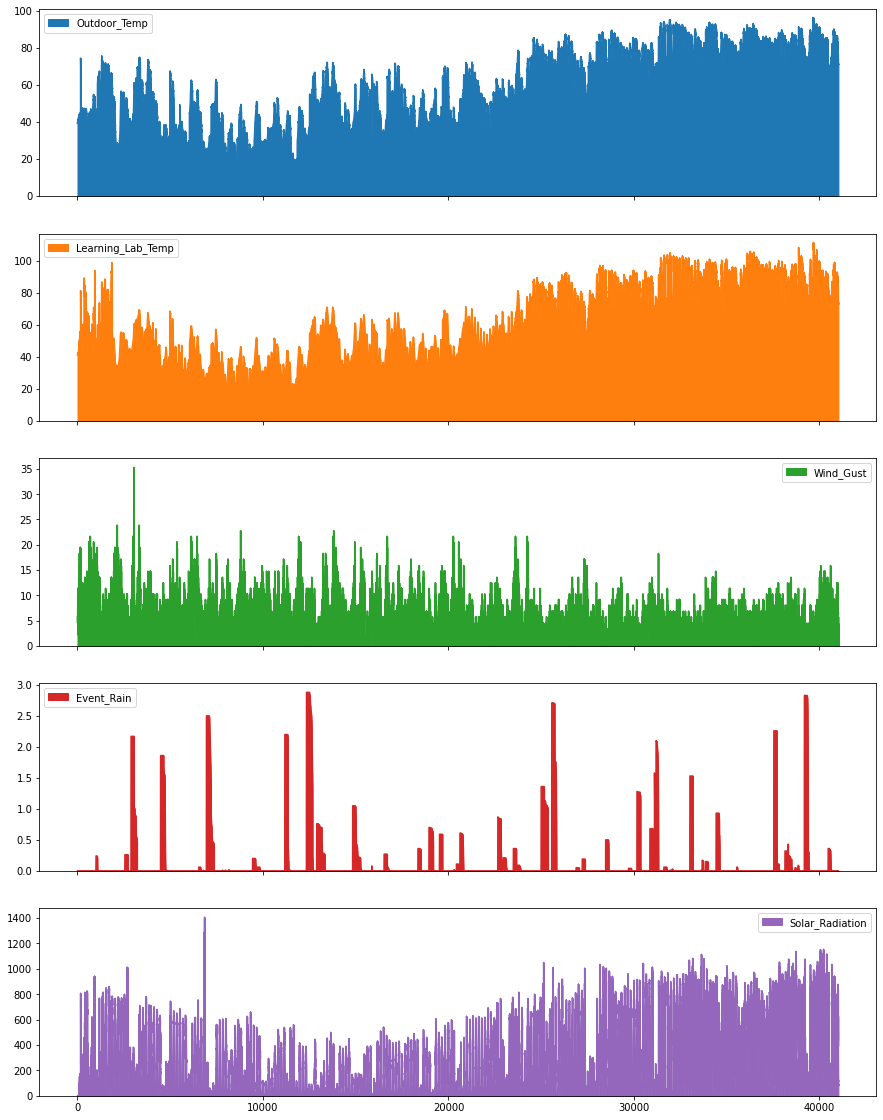

In [59]:
df_small.plot.area(figsize=(15, 20), subplots=True)

<AxesSubplot:xlabel='Solar Radiation', ylabel='Event Rain'>

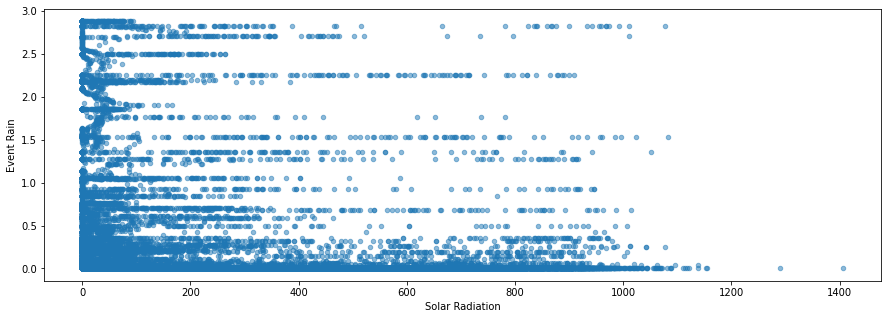

In [60]:
df.plot.scatter(x='Solar Radiation', y='Event Rain',alpha=0.5, figsize=(15, 5))

<AxesSubplot:xlabel='Solar_Radiation', ylabel='Event_Rain'>

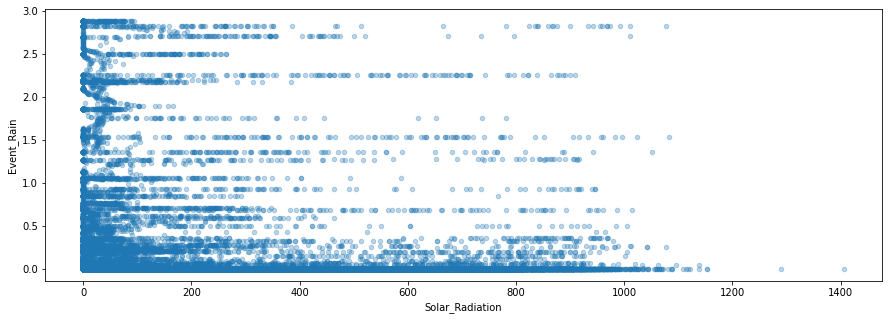

In [65]:
df_small.plot.scatter(x='Solar_Radiation', y='Event_Rain', alpha=0.3, figsize=(15, 5))

KeyError: 'Outdoor_Temperature'

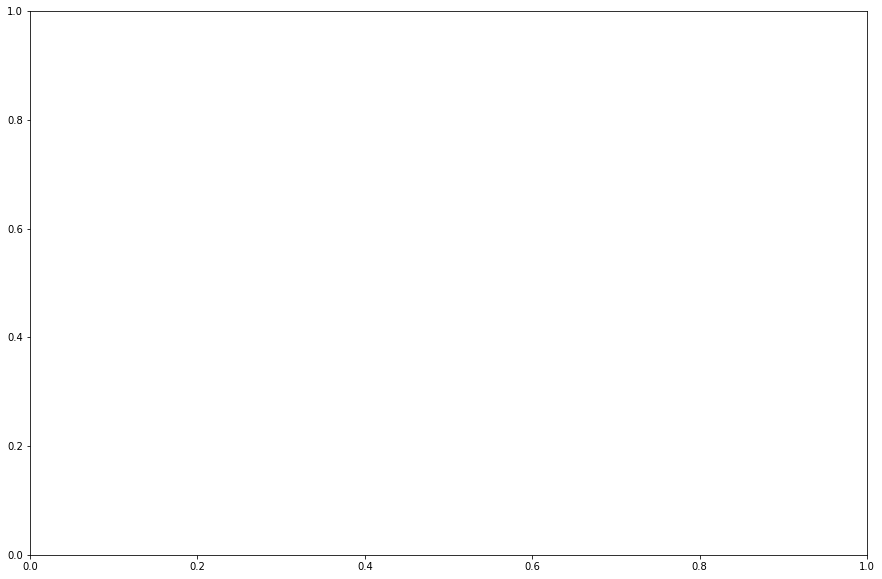

In [67]:
df_small.plot.scatter(x='Solar_Radiation', y='Outdoor_Temperature',alpha=0.3, color='red',figsize=(15, 10))

In [ ]:
df_small_day = df_small.loc[df_small['Simple Date'][] > 82]

In [ ]:
df_small['Date'] = pd.to_datetime(df_small['Date'])

In [ ]:
type(df_small['Date'][0])

In [ ]:
# to drop rows that are outside of the desired time range

morning_cutoff = datetime.datetime.strptime("07:00:00","%H:%M:%S")
evening_cutoff = datetime.datetime.strptime("19:00:00","%H:%M:%S")
for i in range(len(df_small['Date'])):
    time = df_small['Date'][i].time()
    if time < morning_cutoff.time() or time > evening_cutoff.time():
        df_small = df_small.drop(i)

In [ ]:
df_small['Solar_Radiation'].plot(kind='hist',figsize=(15, 5),bins=50)

In [ ]:
pd.set_option('max_rows', 200)


In [ ]:
df_small = df_small.reset_index(drop=True)

In [ ]:
df_small.plot.scatter(x='Solar_Radiation', y='Event_Rain',alpha=0.3, color='red',figsize=(15, 10))

In [ ]:
df_small['Event_Rain'].plot(kind='hist',figsize=(15, 5),bins=10)

In [ ]:
df_corr = df_small.corr()

In [ ]:
sns.heatmap(df_corr, annot=True)

In [ ]:
df_small.isna().sum()

In [ ]:
df_small['Learning_Lab_Temp']=df_small['Learning_Lab_Temp'].round(decimals=0)
df_small['Outdoor_Temp']=df_small['Outdoor_Temp'].round(decimals=0)
df_small['Wind_Gust']=df_small['Wind_Gust'].round(decimals=0)
df_small['Event_Rain']=df_small['Event_Rain'].round(decimals=0)
df_small['Solar_Radiation']=df_small['Solar_Radiation'].round(decimals=0)

In [ ]:
ax = df_small['Wind_Gust'].plot(kind='hist',bins=50,figsize=(15,5))
ax.set_xlabel('Wind Gust')

In [ ]:
ax = df_small['Outdoor_Temp'].plot(kind='hist')
ax.set_xlabel('Outdoor Temp')

In [ ]:
df_small['Outdoor_Temp'].value_counts()

In [ ]:
df = df.drop(columns=['Yearly Rain'])

In [ ]:
df.to_parquet('ambient_parquet')
!ls -GFlash 'ambient_parquet'
df.to_csv('ambient_csv')
!ls -GFlash 'ambient_csv'

In [62]:
df_small.to_parquet('ambient_small_parquet')
!ls -GFlash 'ambient_small_parquet'

432K -rw-r--r-- 1 root 429K Apr  4 22:30 ambient_small_parquet


In [63]:
df_parquet = pd.read_parquet('./ambient_small_parquet')

In [64]:
df_parquet.set_index('Simple Date')

KeyError: "None of ['Simple Date'] are in the columns"

In [ ]:
df_parquet.info()